In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Preprocessing

In [2]:
#importing the data
data = pd.read_csv("HCV.csv")
#removing the attribute patient ID from the data
data = data.drop(data.columns[0], axis = 1)
#removing all suspect blood donors
data = data[data.Category != "0s=suspect Blood Donor"]

In [3]:
#storing only the numerical values
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
print(X[-3:])
#storing the attribute labels
attribute_labels = ["Age", "Male", "Female", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT"]

[[64 'f' 29.0 87.3 3.5 99.0 48.0 1.66 3.63 66.7 64.2 82.0]
 [46 'f' 33.0 nan 39.0 62.0 20.0 3.56 4.2 52.0 50.0 71.0]
 [59 'f' 36.0 nan 100.0 80.0 12.0 9.07 5.3 67.0 34.0 68.0]]


In [4]:
from sklearn.impute import SimpleImputer
#replace all missing values using mean imputation
imputer = SimpleImputer(missing_values = np.nan)
imputer = imputer.fit(X[:, 2:])
X[:, 2:] = imputer.transform(X[:, 2:])
print(X[:3])


[[32 'm' 38.5 52.5 7.7 22.1 7.5 6.93 3.23 106.0 12.1 69.0]
 [32 'm' 38.5 70.3 18.0 24.7 3.9 11.17 4.8 74.0 15.6 76.5]
 [32 'm' 46.9 74.7 36.2 52.6 6.1 8.84 5.2 86.0 33.2 79.3]]


In [5]:
from sklearn.preprocessing import LabelEncoder
#encode all categorical values as digits
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
print(X[:3])
y = labelencoder_X.fit_transform(y)

#Binary encoding of target variable
for i, digit in enumerate(y):
    if digit > 1:
        y[i] = 1

[[32 1 38.5 52.5 7.7 22.1 7.5 6.93 3.23 106.0 12.1 69.0]
 [32 1 38.5 70.3 18.0 24.7 3.9 11.17 4.8 74.0 15.6 76.5]
 [32 1 46.9 74.7 36.2 52.6 6.1 8.84 5.2 86.0 33.2 79.3]]


In [6]:
from sklearn.preprocessing import OneHotEncoder
#encode categorical variable in 2 different attributes (man vs female) where 1 = true and 0 = false
onehotencoder = OneHotEncoder()
encoded_cols = onehotencoder.fit_transform(X[:, 1].reshape(-1,1)).toarray()
X[:, 1] = encoded_cols[:, 0]
X = np.insert(X, 2, encoded_cols[:, 1], axis=1)
print(X[-3:])

[[64 1.0 0.0 29.0 87.3 3.5 99.0 48.0 1.66 3.63 66.7 64.2 82.0]
 [46 1.0 0.0 33.0 67.82101694915255 39.0 62.0 20.0 3.56 4.2 52.0 50.0
  71.0]
 [59 1.0 0.0 36.0 67.82101694915255 100.0 80.0 12.0 9.07 5.3 67.0 34.0
  68.0]]


Figure: Boxplots of the explanatory variables


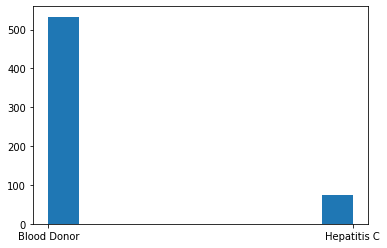

In [7]:
import matplotlib.pyplot as plt

#boxplots of attributes and histogram of variable gender
fig,ax = plt.subplots(4,3,figsize=(8,7))
ax = ax.ravel()
for attribute in range(len(X[0])):
    plot_position = attribute
    if attribute != 1 and attribute != 2:
        if attribute > 2:
            plot_position -= 2
        ax[plot_position].boxplot(X[:,attribute])
        ax[plot_position].set_title(attribute_labels[attribute])
        if attribute ==0:
            ax[plot_position].set_ylabel("years")
        else:
            ax[plot_position].set_ylabel("enzyme concentration")
            

ax[11].hist([X[:,1]])
ax[11].set_title("Sex")
ax[11].set_ylabel("count")
plt.xticks(range(2), ["male", "female"])
plt.tight_layout()
plt.show()
print("Figure: Boxplots of the explanatory variables")

#histogram of target variable
plt.figure()
plt.hist(y)
plt.xticks(range(2), ["Blood Donor", "Hepatitis C"])
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

#standardize explanatory variables
X_standardized = StandardScaler().fit_transform(X)

Figure: First PC plotted on the X-axis and Second PC plotted on the Y-axis


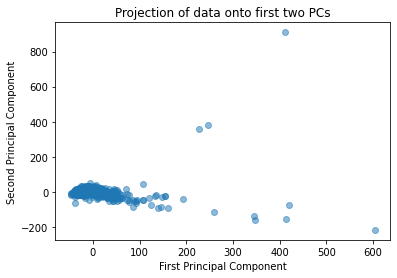

In [9]:
#mean center data
X = X.astype("float64")

μ = np.mean(X, axis=0)

Y = X - μ

#apply PCA
SVD_Y = np.linalg.svd(Y)
U = SVD_Y[0]
S = SVD_Y[1]
V = np.transpose(SVD_Y[2])

Z = np.dot(Y, V)

scatter_pc1_pc2 = plt.figure()

plt.show()

# YOUR CODE HERE
indices = np.arange(5,15)
plt.scatter(Z[:,0],Z[:,1], alpha = 0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Projection of data onto first two PCs')
plt.show()
print('Figure: First PC plotted on the X-axis and Second PC plotted on the Y-axis')

0.7263839881710975


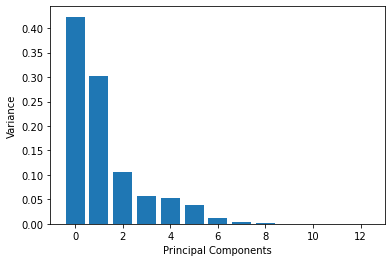

In [10]:
#bar graph of variance of each principle component
rho = np.square(S)/np.sum(np.square(S))

variance_bar_plot = plt.figure()
plt.bar(np.arange(len(rho)),rho)
plt.title('')
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.show()
variance_first_2_pcs = np.sum(rho[0:2])/np.sum(rho)
print(variance_first_2_pcs)

In [11]:
#representation of each attribute in the first two PC's
print(V[:,0])
print(V[:,1])

[ 2.34327404e-02 -1.58493831e-03  1.58493831e-03 -1.14816027e-02
  1.95765911e-01  6.86424687e-02  3.26960964e-01  9.91752251e-02
 -4.54852757e-03 -7.62085780e-04  3.53168237e-01  8.45440668e-01
  4.44753367e-03]
[-1.38534785e-02 -8.16542704e-04  8.16542704e-04  3.95056775e-03
  1.29642408e-02 -6.26207622e-02 -2.18113050e-01 -4.44752793e-02
  2.38214588e-03 -5.36786929e-04  9.26829751e-01 -2.95017394e-01
 -9.78487364e-03]


## Tuning the hyperparamters

### KNN Classifier

Figure: Scores of Accuracy, Precision and Recall as a function of k-neighbours using stratified 10-fold cross-validation with cityblock similarity is shown above


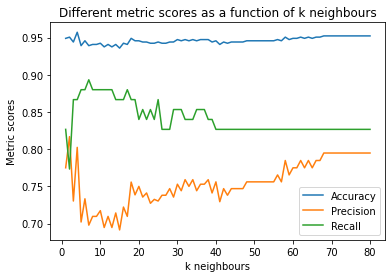

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE #pip install imblearn

#hypertuning the KNN classifier using stratified 10-fold cross validation
kf = StratifiedKFold(n_splits=10)
accuracies = np.zeros(shape = (10, 80))
false_negatives = np.zeros(shape = (10, 80))
false_positives = np.zeros(shape = (10, 80))
true_negatives = np.zeros(shape = (10, 80))
true_positives = np.zeros(shape = (10, 80))
ks = [i for i in range(1, 81)]
for i, (train, test) in enumerate(kf.split(X_standardized, y)):
    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]
    sm = SMOTE()
    X_train, y_train = sm.fit_resample(X_train, y_train)
    for k in range(1, 81):
        clf = KNeighborsClassifier(n_neighbors = k, metric = "cityblock").fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracies[i][k - 1] = accuracy_score(y_test, predictions)
        FP = len([digit for digit in range(len(y_test)) if y_test[digit] == 0 and predictions[digit] == 1])
        TN = len([digit for digit in range(len(y_test)) if y_test[digit] == predictions[digit] == 0])
        TP = len([digit for digit in range(len(y_test)) if y_test[digit] == predictions[digit] == 1])
        FN = len([digit for digit in range(len(y_test)) if y_test[digit] == 1 and predictions[digit] == 0])
        false_negatives[i][k - 1] = FN
        false_positives[i][k - 1] = FP
        true_negatives[i][k - 1] = TN
        true_positives[i][k - 1] = TP

precision = np.divide(np.sum(true_positives, axis=0), (np.add(np.sum(true_positives, axis=0), np.sum(false_positives, axis=0))))
recall = np.divide(np.sum(true_positives, axis=0), (np.add(np.sum(true_positives, axis=0), np.sum(false_negatives, axis=0))))
accuracy = np.mean(accuracies, axis=0)
plt.plot(ks, accuracy, label = "Accuracy")
plt.plot(ks, precision, label = "Precision")
plt.plot(ks, recall, label = "Recall")
plt.title("Different metric scores as a function of k neighbours")
plt.xlabel("k neighbours")
plt.ylabel("Metric scores")
plt.legend()
plt.show()
print("Figure: Scores of Accuracy, Precision and Recall as a function of k-neighbours using stratified 10-fold cross-validation with cityblock similarity is shown above")

### Decision Tree

Figure: Scores of Accuracy, Precision and Recall as a function of depth using stratified 10-fold cross-validation with entropy measure is shown above


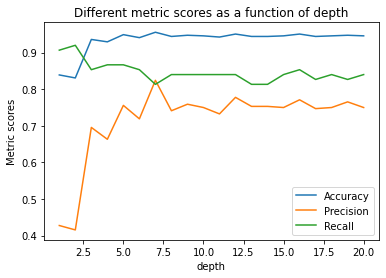

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from imblearn.over_sampling import SMOTE

#hypertuning the DT classifier using stratified 10-fold cross validation
kf = StratifiedKFold(n_splits=10)
accuracies = np.zeros(shape = (10, 20))
false_negatives = np.zeros(shape = (10, 20))
false_positives = np.zeros(shape = (10, 20))
true_negatives = np.zeros(shape = (10, 20))
true_positives = np.zeros(shape = (10, 20))
depths = [i for i in range(1, 21)]
for i, (train, test) in enumerate(kf.split(X, y)):
    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]
    sm = SMOTE()
    X_train, y_train = sm.fit_resample(X_train, y_train)
    for depth in range(1, 21):
        dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth = depth).fit(X_train, y_train)
        predictions = dtc.predict(X_test)
        accuracies[i][depth - 1] = accuracy_score(y_test, predictions)
        FP = len([digit for digit in range(len(y_test)) if y_test[digit] == 0 and predictions[digit] == 1])
        TN = len([digit for digit in range(len(y_test)) if y_test[digit] == predictions[digit] == 0])
        TP = len([digit for digit in range(len(y_test)) if y_test[digit] == predictions[digit] == 1])
        FN = len([digit for digit in range(len(y_test)) if y_test[digit] == 1 and predictions[digit] == 0])
        false_negatives[i][depth - 1] = FN
        false_positives[i][depth - 1] = FP
        true_negatives[i][depth - 1] = TN
        true_positives[i][depth - 1] = TP

precision = np.divide(np.sum(true_positives, axis=0), (np.add(np.sum(true_positives, axis=0), np.sum(false_positives, axis=0))))
recall = np.divide(np.sum(true_positives, axis=0), (np.add(np.sum(true_positives, axis=0), np.sum(false_negatives, axis=0))))
accuracy = np.mean(accuracies, axis=0)
plt.plot(depths, accuracy, label = "Accuracy")
plt.plot(depths, precision, label = "Precision")
plt.plot(depths, recall, label = "Recall")
plt.title("Different metric scores as a function of depth")
plt.xlabel("depth")
plt.ylabel("Metric scores")
plt.legend()
plt.show()
print("Figure: Scores of Accuracy, Precision and Recall as a function of depth using stratified 10-fold cross-validation with entropy measure is shown above")

### Support Vector Machine

Figure: Scores of Accuracy, Precision and Recall as a function of C using stratified 10-fold cross-validation with a polynomial kernel is shown above


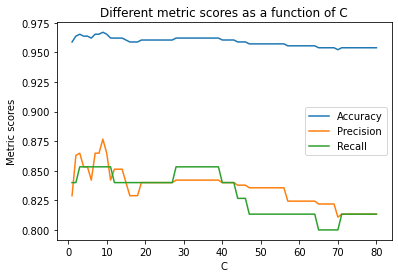

In [14]:
from sklearn.svm import SVC


#hypertuning the SVM classifier using stratified 10-fold cross validation
kf = StratifiedKFold(n_splits = 10)
accuracies = np.zeros(shape = (10, 80))
false_negatives = np.zeros(shape = (10, 80))
false_positives = np.zeros(shape = (10, 80))
true_negatives = np.zeros(shape = (10, 80))
true_positives = np.zeros(shape = (10, 80))
cs = [i for i in range(1, 81)]
for i, (train, test) in enumerate(kf.split(X_standardized, y)):
    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]
    sm = SMOTE()
    X_train, y_train = sm.fit_resample(X_train, y_train)
    for c in range(1, 81):
        svmc = SVC(kernel='poly', degree = 2, C=c).fit(X_train, y_train)
        predictions = svmc.predict(X_test)
        accuracies[i][c - 1] = accuracy_score(y_test, predictions)
        FP = len([digit for digit in range(len(y_test)) if y_test[digit] == 0 and predictions[digit] == 1])
        TN = len([digit for digit in range(len(y_test)) if y_test[digit] == predictions[digit] == 0])
        TP = len([digit for digit in range(len(y_test)) if y_test[digit] == predictions[digit] == 1])
        FN = len([digit for digit in range(len(y_test)) if y_test[digit] == 1 and predictions[digit] == 0])
        false_negatives[i][c - 1] = FN
        false_positives[i][c - 1] = FP
        true_negatives[i][c - 1] = TN
        true_positives[i][c - 1] = TP


precision = np.divide(np.sum(true_positives, axis=0), (np.add(np.sum(true_positives, axis=0), np.sum(false_positives, axis=0))))
recall = np.divide(np.sum(true_positives, axis=0), (np.add(np.sum(true_positives, axis=0), np.sum(false_negatives, axis=0))))
accuracy = np.mean(accuracies, axis=0)
plt.plot(cs, accuracy, label = "Accuracy")
plt.plot(cs, precision, label = "Precision")
plt.plot(cs, recall, label = "Recall")
plt.title("Different metric scores as a function of C")
plt.xlabel("C")
plt.ylabel("Metric scores")
plt.legend()
plt.show()
print("Figure: Scores of Accuracy, Precision and Recall as a function of C using stratified 10-fold cross-validation with a polynomial kernel is shown above")
    

## Results

In [15]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#function to plot confusion matrix
#----CREDIT: this function was taken from assignment 6----
def plot_confusion_matrix(cm,y):
    df_cm = pd.DataFrame(cm, index = ["Hepatitis C" if i == 1 else "Blood donor" for i in np.unique(y)],
                  columns = ["Hepatitis C" if i == 1 else "Blood donor" for i in np.unique(y)])
    plt.figure()
    sn.heatmap(df_cm, annot=True)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()

Accuracy KNN: 0.9104477611940298
Precision KNN: 0.6
Recall KNN: 0.84
Accuracy DT: 0.8258706467661692
Precision DT: 0.41379310344827586
Recall DT: 0.96
Accuracy SVM: 0.9502487562189055
Precision SVM: 0.7419354838709677
Recall SVM: 0.92
Accuracy Ensemble: 0.9402985074626866
Precision Ensemble: 0.696969696969697
Recall Ensemble: 0.92


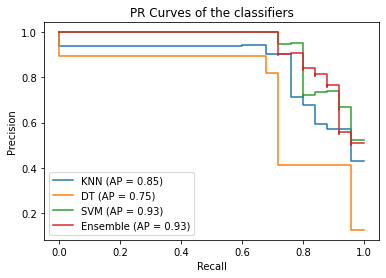

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import PrecisionRecallDisplay

#obtaining the results of the classifiers using a single stratified train, test split with test size of 33%
random_state = 1337
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = random_state, stratify = y)
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
#--- The K-Nearest Neighbour Classifier ---
KNN = KNeighborsClassifier(n_neighbors = 11, metric = "cityblock").fit(X_train, y_train)
KNN_predictions = KNN.predict(X_test)
KNN_matrix = confusion_matrix(y_test, KNN_predictions)
plot_confusion_matrix(KNN_matrix, y)
print("Accuracy KNN: " + str(accuracy_score(y_test, KNN_predictions)))
print("Precision KNN: " + str(precision_score(y_test, KNN_predictions)))
print("Recall KNN: " + str(recall_score(y_test, KNN_predictions)))
KNN_probs = KNN.predict_proba(X_test)[:, 1]
FP_KNN, TP_KNN, _ = roc_curve(y_test, KNN_probs)

#--- The Decision Tree Classifier ---
DT = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 2).fit(X_train, y_train)
DT_predictions = DT.predict(X_test)
DT_matrix = confusion_matrix(y_test, DT_predictions)
plot_confusion_matrix(DT_matrix, y)
print("Accuracy DT: " + str(accuracy_score(y_test, DT_predictions)))
print("Precision DT: " + str(precision_score(y_test, DT_predictions)))
print("Recall DT: " + str(recall_score(y_test, DT_predictions)))
DT_probs = DT.predict_proba(X_test)[:, 1]
FP_DT, TP_DT, _ = roc_curve(y_test, DT_probs)

#--- The Support Vector Machine Classifier ---
SVM = SVC(kernel='rbf', C=6, probability=True).fit(X_train, y_train)
SVM_predictions = SVM.predict(X_test)
SVM_matrix = confusion_matrix(y_test, SVM_predictions)
plot_confusion_matrix(SVM_matrix, y)
print("Accuracy SVM: " + str(accuracy_score(y_test, SVM_predictions)))
print("Precision SVM: " + str(precision_score(y_test, SVM_predictions)))
print("Recall SVM: " + str(recall_score(y_test, SVM_predictions)))
SVM_probs = SVM.predict_proba(X_test)[:, 1]
FP_SVM, TP_SVM, _ = roc_curve(y_test, SVM_probs)

#--- The ensemble classifier---
estimators = []
estimators.append(('KNN', KNN))
estimators.append(('DT', DT))
estimators.append(('SVM', SVM))
ensemble = VotingClassifier(estimators, voting='soft').fit(X_train,y_train)
ensemble_predictions = ensemble.predict(X_test)
ensemble_matrix = confusion_matrix(y_test, ensemble_predictions)
plot_confusion_matrix(ensemble_matrix, y)
print("Accuracy Ensemble: " + str(accuracy_score(y_test, ensemble_predictions)))
print("Precision Ensemble: " + str(precision_score(y_test, ensemble_predictions)))
print("Recall Ensemble: " + str(recall_score(y_test, ensemble_predictions)))
ENS_probs = ensemble.predict_proba(X_test)[:, 1]

#PR curve
plt.figure()
PrecisionRecallDisplay.from_predictions(y_test, KNN_probs, ax = plt.gca(), name = "KNN")
PrecisionRecallDisplay.from_predictions(y_test, DT_probs, ax = plt.gca(), name = "DT")
PrecisionRecallDisplay.from_predictions(y_test, SVM_probs, ax = plt.gca(), name = "SVM")
PrecisionRecallDisplay.from_predictions(y_test, ENS_probs, ax = plt.gca(), name = "Ensemble")
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curves of the classifiers')
plt.show()